In [171]:
import os
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib as plt
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS
import nltk

In order to extract articles I'm going to use a library called GoogleNews
https://pypi.org/project/GoogleNews/

license here:
https://github.com/Iceloof/GoogleNews/blob/master/LICENSE

In [94]:
dict_time = {'06/01/2020' : '12/31/2020',
             '06/01/2021' : '12/31/2021',
             '06/01/2022' : '12/31/2022',
             '06/01/2023' : '12/31/2023',
             '06/01/2019' : '12/31/2019',
             '06/01/2018' : '12/31/2018',
             '06/01/2017' : '12/31/2017',
             '06/01/2016' : '12/31/2016',
             '06/01/2015' : '12/31/2015',
             '06/01/2014' : '12/31/2014',
             '01/01/2020' : '06/01/2020',
             '01/01/2021' : '06/01/2021',
             '01/01/2022' : '06/01/2022',
             '01/01/2023' : '06/01/2023',
             '01/01/2019' : '06/01/2019',
             '01/01/2018' : '06/01/2018',
             '01/01/2017' : '06/01/2017',
             '01/01/2016' : '06/01/2016',
             '01/01/2015' : '06/01/2015',
             '01/01/2014' : '06/01/2014'}

df_final = pd.DataFrame()

for x in dict_time:
    googlenews = GoogleNews(start=x,end=dict_time[x])
    googlenews.get_news('Housing Ireland')
    googlenews.enableException(True)
    result_FINAL = googlenews.result(sort=True)
    df_n = pd.DataFrame(result_FINAL)
    df_n['year'] = dict_time[x]
    df_n['year']= df_n['year'].str[-4:]
    df_final = df_final.append(df_n)

In [95]:
df_final = df_final.drop_duplicates()
df_final.shape

(1989, 9)

In [101]:
headlines = df_final[['title','media','year']]
headlines.head()

,title,media,year
0,One third of voters think Sinn Féin can solve ...,Newstalk,2020
1,"Housing Measures: What's changed, what will im...",RTE.ie,2020
2,Ireland's largest private landlord facing AGM ...,RTE.ie,2020
3,Roderic O'Gorman 'displeased' over tree fellin...,Independent.ie,2020
4,FactFind: Was the 2008 crash caused by buildin...,TheJournal.ie,2020


In [111]:
headlines.isna().sum()

title    0
media    0
year     0
dtype: int64

Text(0.5, 1.0, 'Number of articles by newspaper')

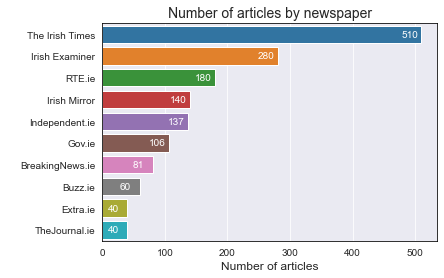

In [159]:
custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
ax = sns.countplot(y=headlines["media"], order=headlines.media.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0], padding=-20, color='white', fontsize=10)
headlines["media"].unique()
ax.set_xlabel("Number of articles",fontsize=12)
ax.set_ylabel(" ")
ax.set_title("Number of articles by newspaper",fontsize=14)

In [194]:
stopwords = set(STOPWORDS)
text = headlines['title'].str.cat(sep=' ')
tokens = nltk.word_tokenize(text)


In [209]:
headlines.to_csv('C:\\Users\\santi\\OneDrive\\Documenti\prove.csv')